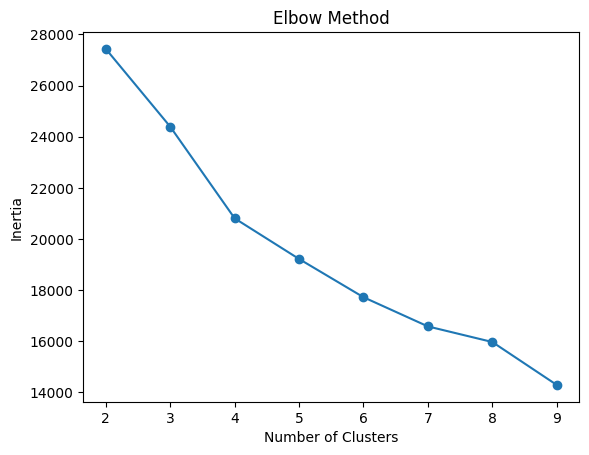

Silhouette Score: 0.749371198504799


/tmp/ipykernel_9797/3272642013.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)


TypeError: agg function failed [how->mean,dtype->object]

In [9]:
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../..")
sys.path.append("../../..")

from stocks.stocks_data import camel_to_snake

# Assume df is your DataFrame with stock data
df = pd.read_csv("../data/base/all_stocks.csv")


# Select relevant features for clustering
features = list(
    map(
        camel_to_snake,
        [
            "marketCap",
            "enterpriseValue",
            "totalRevenue",
            "ebitda",
            "freeCashflow",
            "priceToBook",
            "priceToSalesTrailing12Months",
            "enterpriseToRevenue",
            "enterpriseToEbitda",
            "trailingPE",
            "profitMargins",
            "grossMargins",
            "ebitdaMargins",
            "operatingMargins",
            "earningsGrowth",
            "revenueGrowth",
            "earningsQuarterlyGrowth",
            "netIncomeToCommon",
            "trailingEps",
            "debtToEquity",
            "quickRatio",
            "currentRatio",
            "returnOnAssets",
            "returnOnEquity",
            "beta",
            "fiftyTwoWeekLow",
            "fiftyTwoWeekHigh",
            "fiftyDayAverage",
            "twoHundredDayAverage",
        ],
    )
)

# Filter out stocks with missing values in the selected features
df_filtered = df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered[features])

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


# Plot the elbow curve
plt.plot(range(2, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Based on the elbow method, choose an optimal number of clusters
optimal_clusters = 7  # choice based on elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)

# Calculate silhouette score to evaluate clustering quality
sil_score = silhouette_score(scaled_df, df_filtered["Cluster"])
print(f"Silhouette Score: {sil_score}")

# Analyze the characteristics of each cluster
cluster_summary = df_filtered.groupby("Cluster").mean()
print(cluster_summary)

# Example visualization of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="marketCap", y="priceToBook", hue="Cluster", data=df_filtered, palette="Set1"
)
plt.title("Clusters based on Market Cap and Price to Book Ratio")
plt.show()